# Part II - (US Flight Analysis)
## by (Ifeoma Benson)

 



## Investigation Overview

The investigation carried out on the US Flights from 2006-2008, I looked at the number of Flights, Delays & Cancellations by hour, day, month, max hours and unique carrier. My primary Goal was to investigate cause of delays & cancellations in US Flights. 
  


## Dataset Overview

The dataset reports flights in the United States, including carriers, arrival and departure delays from 1987 to 2008. I gathered & analyze data for three years (2006, 2007 & 2008).  The total number of  observations are 16,984,354.
 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings

warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
cleaned = pd.read_csv('cleaned.csv')
cleaned_cancel = pd.read_csv('cleaned_cancel.csv')
cleaned_delay = pd.read_csv('cleaned_delay.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distibution of Flight and Cancellation From Year 2006-2008)
 

There are four types of cancellations and this graph shows the distribution of them for 3 years. The distibution of cancellation code/cause through out the 3 years in their first quarter  shows carrier cause was the highest reason for cancellation followed by weather.
 

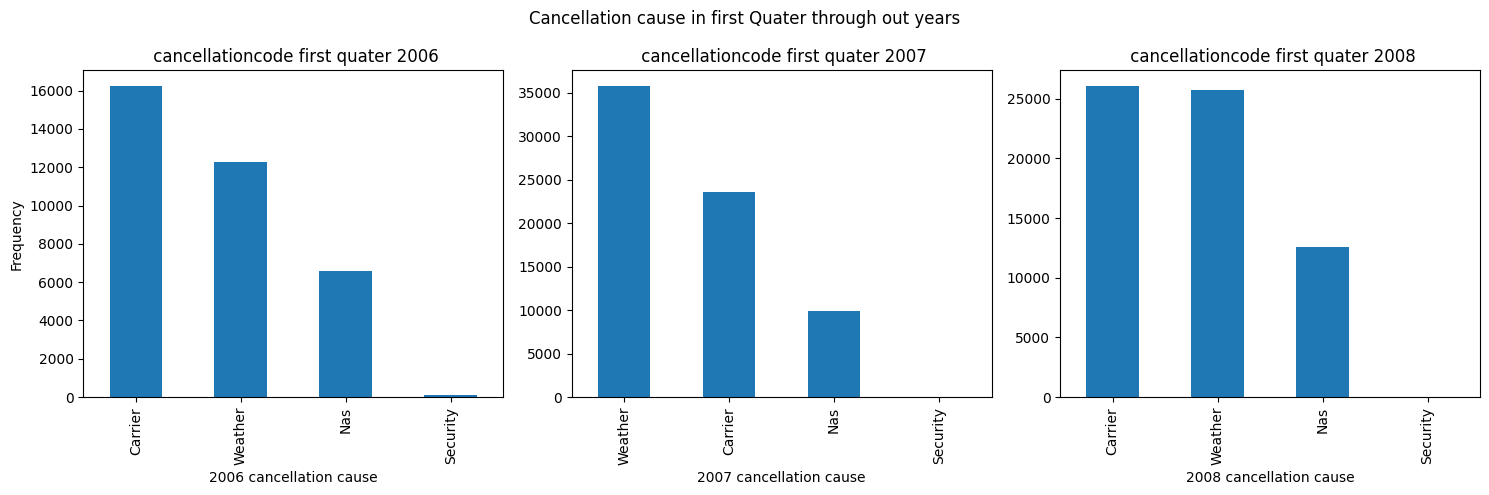

In [3]:
#used query method to filter dataset for year , cancellation and just the first quater

cancellation_2006 = cleaned.query('year == 2006 & month <=4')
cancellation_2007 = cleaned.query('year == 2007 & month <=4')
cancellation_2008 = cleaned.query('year == 2008 & month <=4')


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)


#bar plot of cancellation cause in 2006
cancellation_2006.cancellationcode.value_counts().plot(kind='bar')
plt.xlabel('2006 cancellation cause')
plt.ylabel('Frequency')
plt.title(' cancellationcode first quater 2006')


plt.subplot(1,3,2)
#bar plot of cancellation cause in 2007
cancellation_2007.cancellationcode.value_counts().plot(kind='bar')
plt.xlabel('2007 cancellation cause')
plt.title(' cancellationcode first quater 2007')



plt.subplot(1,3,3)
#bar plot of cancellation cause in 2008
cancellation_2008.cancellationcode.value_counts().plot(kind='bar')
plt.xlabel('2008 cancellation cause')
plt.title(' cancellationcode first quater 2008')
plt.suptitle('Cancellation cause in first Quater through out years');

plt.tight_layout()

## (Carrier with highest delay and cancellation 2)

>  American Eagle had the highest cancellation count and it was the fourth most used carrier, SouthEast was the most used carrier but had the highest depdelay in time

Text(0.5, 0, 'UniqueCarrier')

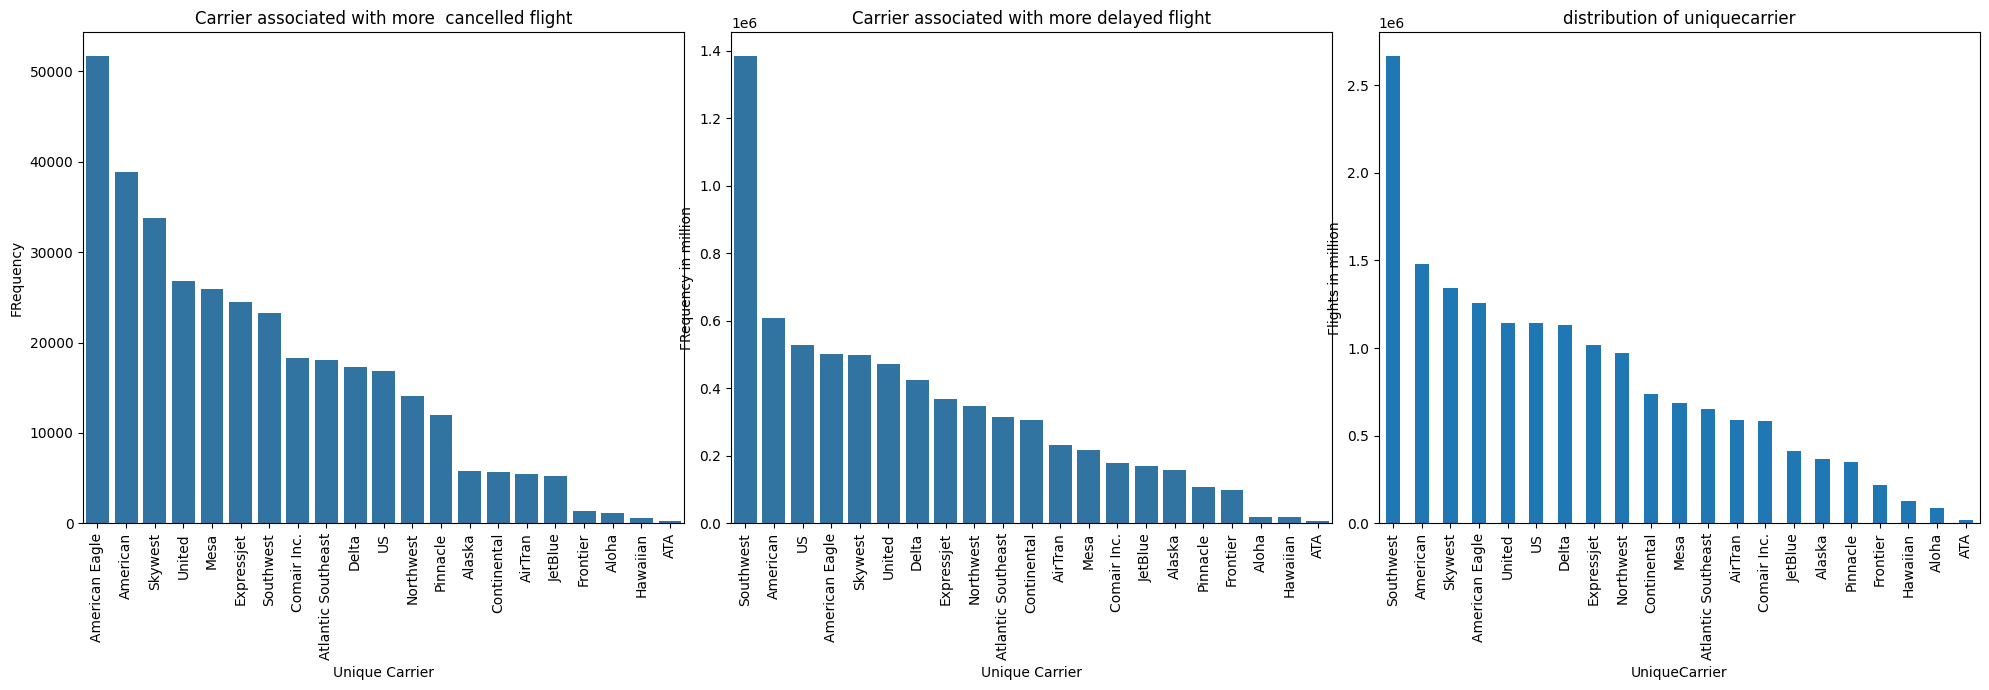

In [4]:
#set color
base_color = sb.color_palette()[0]


#plot carrier associated with more cancelled flight
fig,axes = plt.subplots(figsize=(20,7))
plt.subplot(1,3,1);
 
#value count of uniquecarriers and assigning to variable called carrier_Value
carrier_delay = cleaned_cancel.uniquecarrier.value_counts()
carrier_value = carrier_delay.values

sb.barplot(x=carrier_delay.index,y=carrier_value,color=base_color)
 
plt.xticks(rotation = 90);
plt.tight_layout()
plt.title('Carrier associated with more  cancelled flight')
plt.xlabel('Unique Carrier')
plt.ylabel('FRequency');

#value count of uniquecarriers and assigning to variable called carrier_Value
carrier_delay_2 = cleaned_delay.uniquecarrier.value_counts()
carrier_value_2 = carrier_delay_2.values

#plot carrier associated with more cancelled flight
plt.subplot(1,3,2);
 
sb.barplot(x=carrier_delay_2.index,y=carrier_value_2, color=base_color)
plt.xticks(rotation = 90);
plt.tight_layout()
plt.title('Carrier associated with more delayed flight')
plt.xlabel('Unique Carrier')
plt.ylabel('FRequency in million');

plt.subplot(1,3,3);

#plot distribution of uniquecarrier
#plt.figure(figsize=(13,7))
cleaned.uniquecarrier.value_counts().plot(kind = 'bar')
plt.title('distribution of uniquecarrier')
plt.ylabel('Flights in million')
plt.xlabel('UniqueCarrier')




## (ScheduledDepature Time & Delay 3)

>This report is to show the max hours, days that has low chances of being delayed or cancelled. For Delayed Flights, Saturday scheduled flight had the lower chances of been delayed  with average scheduled time at 1pm - 2pm and sunday with the most delay flight around 3pm- 4pm. For cancelled Flights, Thursday had the lowest cancellation flights with an average time at 12:30pm - 1:30pm

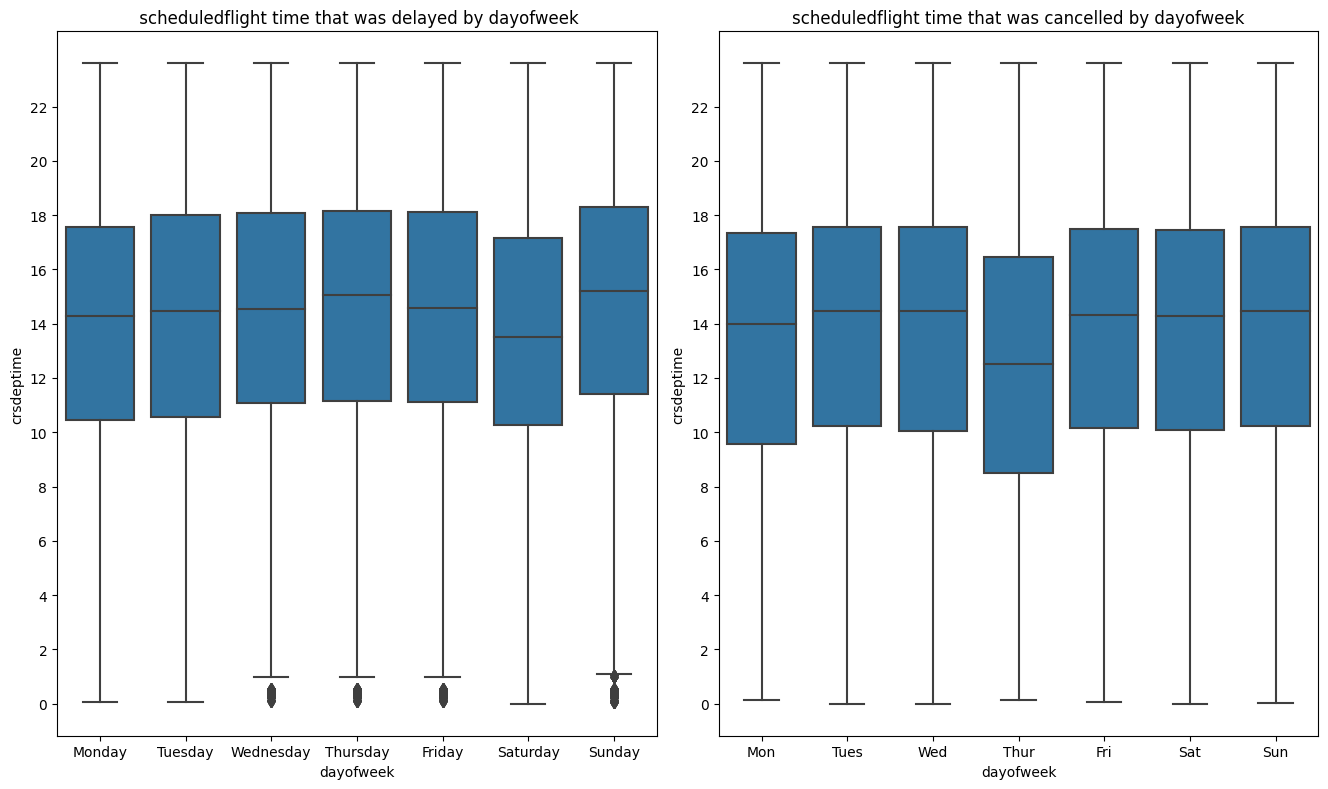

In [5]:
#plot Distribution of schedflight time that was delayed by dayofweek' 
plt.figure(figsize=(20,8))
plt.subplot(1,3,1);
Schedhours = cleaned_delay.crsdeptime/100

sb.boxplot(y= Schedhours, x='dayofweek' ,data= cleaned_delay,color= base_color, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.yticks(np.arange(0,24,2))
plt.title(' scheduledflight time that was delayed by dayofweek')
plt.tight_layout();

#plot scheduledflight time that was cancelled by dayofweek
plt.subplot(1,3,2);
Schedhours = cleaned_cancel.crsdeptime/100
sb.boxplot(y= Schedhours, x='dayofweek' ,data= cleaned_cancel,color= base_color)
plt.yticks(np.arange(0,24,2))
plt.xticks([0,1,2,3,4,5,6],['Mon','Tues','Wed','Thur','Fri','Sat','Sun'])
plt.title('scheduledflight time that was cancelled by dayofweek')
plt.tight_layout();


# Destinations with more delayed or cancelled flight

> ORD had more flight cancellation but ATL was the most frequent destination of flight 

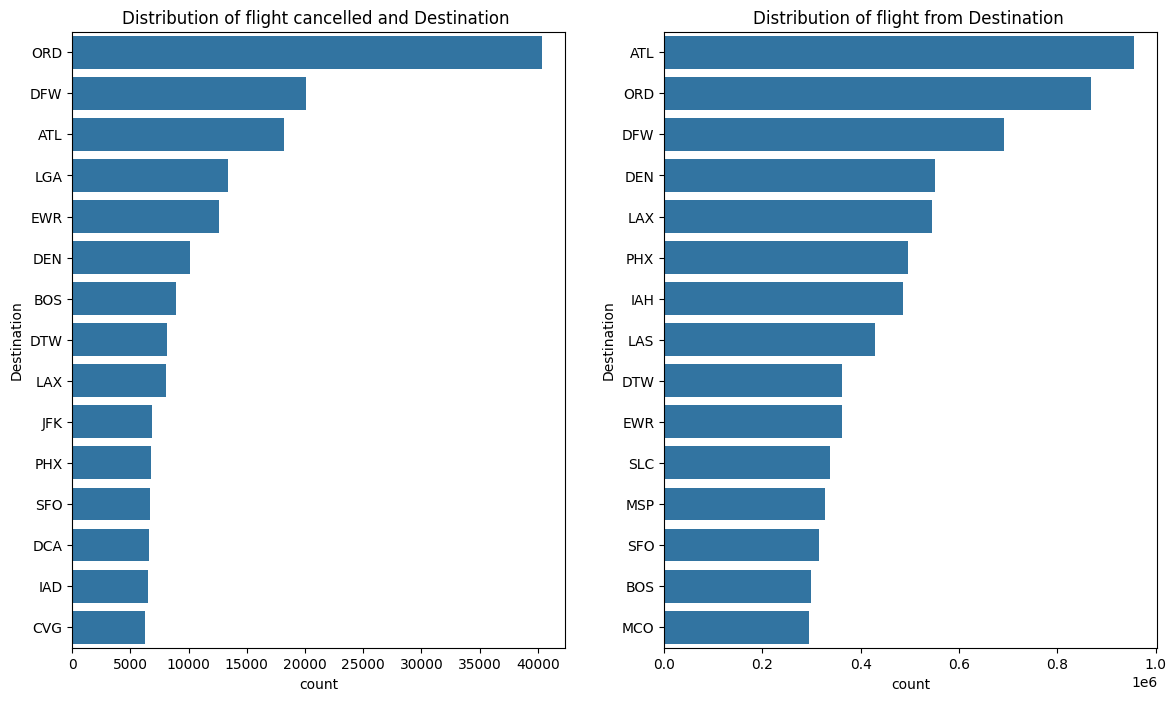

In [6]:
#use cancelled rows to search for destination that are prone to flight cancellation
cleaned_dest = cleaned_cancel.dest.value_counts().head(15)
dest_valu = cleaned_dest.values
 

#plot a barplot of the distribution above
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sb.barplot(y=cleaned_dest.index , x=dest_valu,color=base_color)
plt.title('Distribution of flight cancelled and Destination ')
plt.ylabel('Destination')
plt.xlabel('count');

#frequency of most origin destination
cleaned_dest_1 = cleaned.dest.value_counts().head(15)
dest_valu_1 = cleaned_dest_1.values
#plot the distribution of flight from destination
plt.subplot(1,2,2)
sb.barplot(y=cleaned_dest_1.index , x=dest_valu_1, color=base_color)
plt.title('Distribution of flight from Destination ')
plt.ylabel('Destination')
plt.xlabel('count');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert slide_deck_template.ipynb --to slides --template output-toggle.tpl --post serve